In [2]:
!pip install azure-cognitiveservices-vision-computervision==0.9.0

# <snippet_imports>
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials

import pandas as pd
import os
from matplotlib import colors
# </snippet_imports>


class CvApiConnector:

    def __init__(self):
        '''
        Authenticate
        Authenticates your credentials and creates a client.
        '''
        # <snippet_vars>
        subscription_key = "b95707dd15cd4f8da5aaa62924a0bd9d"
        endpoint = "https://synthertest.cognitiveservices.azure.com/"
        # </snippet_vars>
        # </snippet_imports_and_vars>

        # <snippet_client>
        self.computervision_client = ComputerVisionClient(
            endpoint, CognitiveServicesCredentials(subscription_key))
        # </snippet_client>
        '''
        END - Authenticate
        '''

    def describe(self, remote_image_url):
        description_results = self.computervision_client.describe_image(
            remote_image_url)

        # Get the captions (descriptions) from the response, with confidence level
        print("Description of remote image: ")
        if (len(description_results.captions) == 0):
            print("No description detected.")
        else:
            for caption in description_results.captions:
                print("'{}' with confidence {:.2f}%".format(
                    caption.text, caption.confidence * 100))

        return description_results

    def categorize(self, remote_image_url):
        # Select the visual feature(s) you want.
        remote_image_features = ["categories"]
        # Call API with URL and features
        categorize_results_remote = self.computervision_client.analyze_image(
            remote_image_url, remote_image_features)

        # Print results with confidence score
        print("Categories from remote image: ")
        if (len(categorize_results_remote.categories) == 0):
            print("No categories detected.")
        else:
            for category in categorize_results_remote.categories:
                print("'{}' with confidence {:.2f}%".format(
                    category.name, category.score * 100))

        return categorize_results_remote

    def tag(self, remote_image_url):
        # Call API with given image
        tags_result_remote = self.computervision_client.tag_image(remote_image_url)
        return tags_result_remote

    def faces(self, remote_image_url):
        # Select the visual feature(s) you want.
        remote_image_features = ["faces"]
        # Call the API with remote URL and features
        detect_faces_results_remote = self.computervision_client.analyze_image(
            remote_image_url, remote_image_features)
        # Print the results with gender, age, and bounding box
        print("Faces in the remote image: ")
        if (len(detect_faces_results_remote.faces) == 0):
            print("No faces detected.")
        else:
            for face in detect_faces_results_remote.faces:
                print("'{}' of age {} at location {}, {}, {}, {}".format(face.gender, face.age,
                                                                         face.face_rectangle.left, face.face_rectangle.top,
                                                                         face.face_rectangle.left + face.face_rectangle.width,
                                                                         face.face_rectangle.top + face.face_rectangle.height))

        return detect_faces_results_remote

    def inappropriate(self, remote_image_url):
        # Select the visual feature(s) you want
        remote_image_features = ["adult"]
        # Call API with URL and features
        detect_adult_results_remote = self.computervision_client.analyze_image(
            remote_image_url, remote_image_features)

        # Print results with adult/racy score
        print("Analyzing remote image for adult or racy content ... ")
        print("Is adult content: {} with confidence {:.2f}".format(
            detect_adult_results_remote.adult.is_adult_content, detect_adult_results_remote.adult.adult_score * 100))
        print("Has racy content: {} with confidence {:.2f}".format(
            detect_adult_results_remote.adult.is_racy_content, detect_adult_results_remote.adult.racy_score * 100))

        return detect_adult_results_remote

    def color(self, remote_image_url):
        # Select the feature(s) you want
        remote_image_features = ["color"]
        # Call API with URL and features
        detect_color_results_remote = self.computervision_client.analyze_image(
            remote_image_url, remote_image_features)
        return detect_color_results_remote

    def domain(self, remote_image_url, domain):
        # Call API with content type and URL
        # here we can use celebrities or landmark or other domain
        detect_domain_results_remote = self.computervision_client.analyze_image_by_domain(
            domain, remote_image_url)

        # Print detection results with name
        print(domain + "in the remote image:")
        if len(detect_domain_results_remote.result[domain]) == 0:
            print("No elements detected.")
        else:
            for element in detect_domain_results_remote.result[domain]:
                print(element["name"])

        return detect_domain_results_remote

    def image_type(self, remote_image_url):
        # Select visual feature(s) you want
        remote_image_features = [VisualFeatureTypes.image_type]
        # Call API with URL and features
        detect_type_results_remote = self.computervision_client.analyze_image(
            remote_image_url, remote_image_features)

        # Prints type results with degree of accuracy
        print("Type of remote image:")
        if detect_type_results_remote.image_type.clip_art_type == 0:
            print("Image is not clip art.")
        elif detect_type_results_remote.image_type.clip_art_type == 1:
            print("Image is ambiguously clip art.")
        elif detect_type_results_remote.image_type.clip_art_type == 2:
            print("Image is normal clip art.")
        else:
            print("Image is good clip art.")

        if detect_type_results_remote.image_type.line_drawing_type == 0:
            print("Image is not a line drawing.")
        else:
            print("Image is a line drawing")

        return detect_type_results_remote

    def objects(self, remote_image_url):
        # Call API with URL
        detect_objects_results_remote = self.computervision_client.detect_objects(
            remote_image_url)

        # Print detected objects results with bounding boxes
        print("Detecting objects in remote image:")
        if len(detect_objects_results_remote.objects) == 0:
            print("No objects detected.")
        else:
            for object in detect_objects_results_remote.objects:
                print("object at location {}, {}, {}, {}".format(
                    object.rectangle.x, object.rectangle.x + object.rectangle.w,
                    object.rectangle.y, object.rectangle.y + object.rectangle.h))

        return detect_objects_results_remote

    def brands(self, remote_image_url):
        # Select the visual feature(s) you want
        remote_image_features = ["brands"]
        # Call API with URL and features
        detect_brands_results_remote = self.computervision_client.analyze_image(
            remote_image_url, remote_image_features)

        print("Detecting brands in remote image: ")
        if len(detect_brands_results_remote.brands) == 0:
            print("No brands detected.")
        else:
            for brand in detect_brands_results_remote.brands:
                print("'{}' brand detected with confidence {:.1f}% at location {}, {}, {}, {}".format(
                    brand.name, brand.confidence *
                    100, brand.rectangle.x, brand.rectangle.x + brand.rectangle.w,
                    brand.rectangle.y, brand.rectangle.y + brand.rectangle.h))

        return detect_brands_results_remote


In [3]:
#!pip install azure-storage-blob
from tqdm import tqdm
import os
import sys
from azure.storage.blob import BlobServiceClient, __version__, generate_blob_sas, BlobSasPermissions
from datetime import datetime, timedelta

In [4]:
# account sensitive information - these are dummy informaiton
account_name = 'synther#####'
cv_api_key = 'b95707dd15cd4f8da5aaa62924#####'
connection_string = 'DefaultEndpointsProtocol=https;AccountName=synthers#####;AccountKey=wVEZgArKDQvvAig9Oz3C2oKbnLTUvkAm0fM9RXS4MHUJghIPooUEXLdVuECEnt1zLRTVDVYzJJapwrlJ#####==;EndpointSuffix=core.windows.net'
account_key = "#####rKDQvvAig9Oz3C2oKbnLTUvkAm0fM9RXS4MHUJghIPooUEXLdVuECEnt1zLRTVDVYzJJapwrlJ#####=="
container_name = "synther-flatt#####-#####"

In [5]:
blob_service_client = BlobServiceClient.from_connection_string(connection_string)
blob_container = blob_service_client.get_container_client(container_name)
blobs_list = blob_container.list_blobs()

names_blobContent = []
print("Collecting the blob names now. ")
for b in blobs_list:
    names_blobContent.append(b.name)

print("Length of the blob list: ", len(names_blobContent))

count = 0
for i in names_blobContent:
    if '.jpg' in i:
        count += 1
print(count, len(names_blobContent)) 

Length of the blob list:  101100
101096 101100


From above observation, we can say that there are 4 .csv file and rest are images

#### Download the blob containing latest csv

In [6]:
csv_blob_name = 'Instagram_profile_20220312_204257.csv'
path_csv = 'C:/Users/sande/Documents/GitHub/Instagram-Engangment-Prediction-NLP-Categorisation/'+ csv_blob_name 
blob_client = blob_service_client.get_blob_client(container=container_name, blob=csv_blob_name) 

with open(os.path.join(path_csv), "bw") as download_file:
                download_file.write(blob_client.download_blob().readall())

In [7]:
dfRaw = pd.read_csv(path_csv)
dfRaw.shape

C:\Users\sande\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,1,2,3,5,6,9,14,15,18,19,48) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(114149, 49)

Getting the number of unique image links. Rows which are empty have numerical type.  

In [8]:
count = 0
df_imgLink = []
for i in tqdm(range(dfRaw.shape[0])):
    if type(dfRaw['image_url'][i]) != float:
        df_imgLink.append(dfRaw['image_url'][i])
print(len(df_imgLink))

100%|██████████| 114149/114149 [00:03<00:00, 29795.07it/s]

88516


Checks whether all elements of df_imgLink is contained in names_blobContent. 

In [9]:
no_go = []
for i in tqdm(df_imgLink):
    if i not in names_blobContent:
        no_go.append(i)
len(no_go)

100%|██████████| 88516/88516 [04:23<00:00, 336.28it/s]


0

In [10]:
#Checking whether the images in the csv files(df_imgLink) are contained in the blobContent
set(df_imgLink) <= set(names_blobContent)

True

Testing whether the rows have more than one link in csv file. 

In [11]:
net_length = 0
for i in df_imgLink:
    length_links = len(i)
    net_length += length_links
print("Image links have the average word size of:", int(net_length/len(df_imgLink)), "words.")

Image links have the average word size of: 98 words.


In [12]:
# So links having lenght> ~98 will contain more than one image links 
count = 0
for i in df_imgLink:
    if len(i)>=100:
        count += 1
print("There are",count, "rows with multiple image links!")

There are 0 rows with multiple image links!


Getting count of images in the names_blobContent

In [13]:
count = 0
for i in tqdm(names_blobContent):
    if '.jpg' in i:
        count += 1
print(count)

100%|██████████| 101100/101100 [00:00<00:00, 526364.04it/s]

101096


Download and check the image. 

In [82]:
import random
from IPython.display import Image

images_rndm = random.sample(df_imgLink, 5)
random_imglist =  images_rndm
for i in random_imglist:
    blob_client = blob_service_client.get_blob_client(container=container_name, blob = i)
    with open('C:/Users/sande/Documents/GitHub/Instagram-Engangment-Prediction-NLP-Categorisation/test_img'+i, "wb") as download_file:
                download_file.write(blob_client.download_blob().readall())

In [27]:
Getting the instagram links for the randomly selects posts. 
link_insta = []
for i in images_rndm:
    link_insta.append(dfRaw.loc[dfRaw['image_url']== i, 'url'].iloc[0])
link_insta

['https://www.instagram.com/p/CPTv9vGnb9S/',
 'https://www.instagram.com/p/COr3k0tB_Gd/',
 'https://www.instagram.com/p/CUFwaRljgwB/',
 'https://www.instagram.com/p/CR8y39MIdfb/',
 'https://www.instagram.com/p/CSRA1J1I8Ny/']

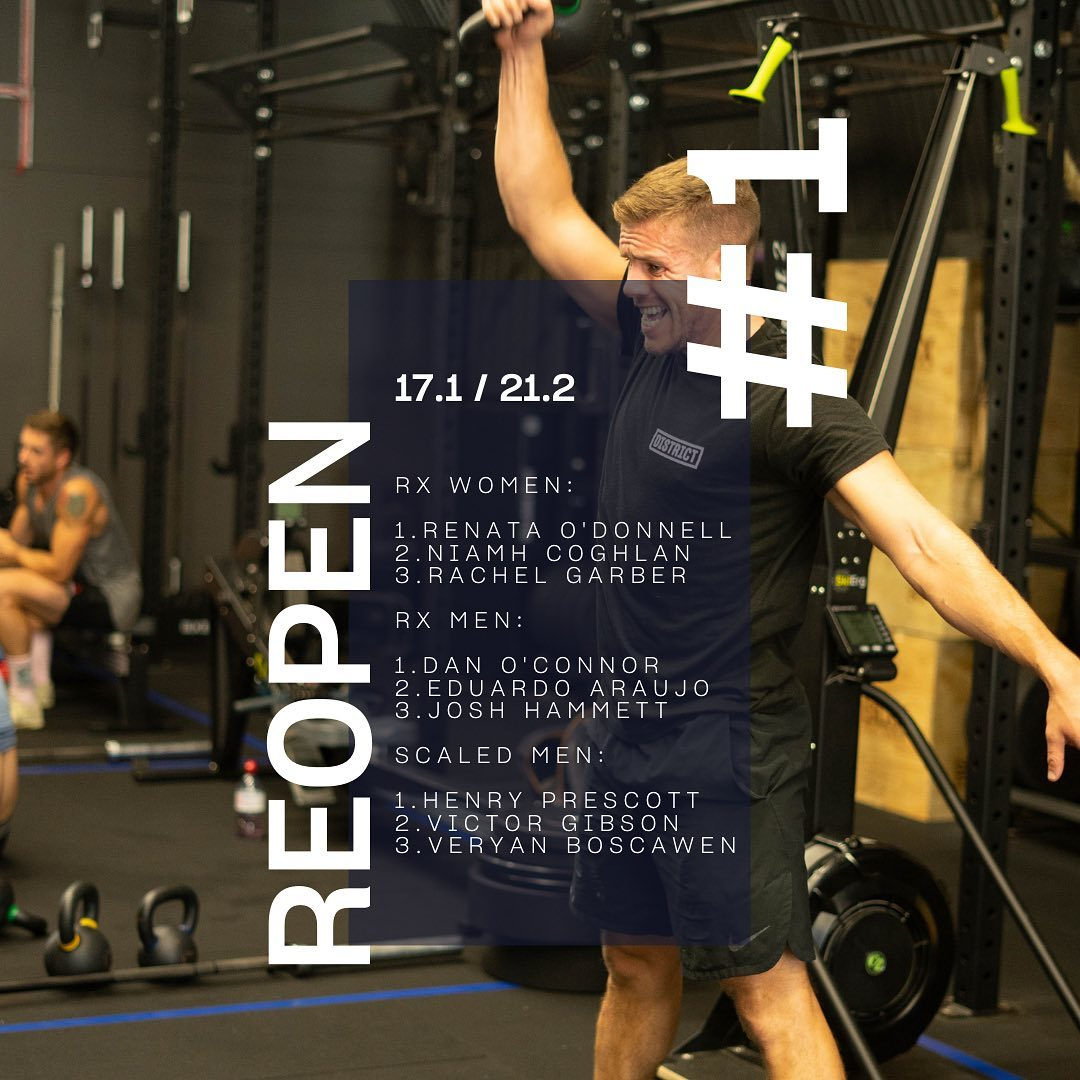

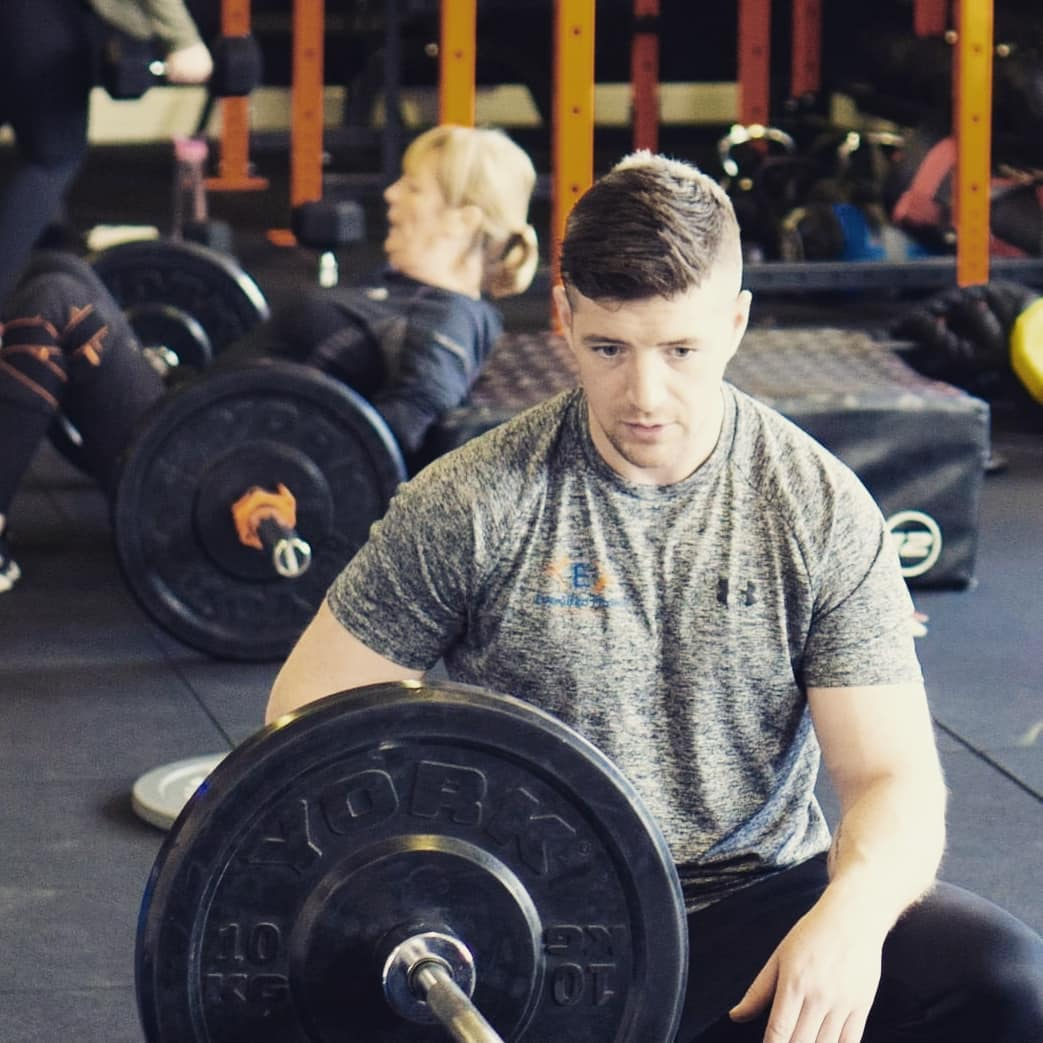

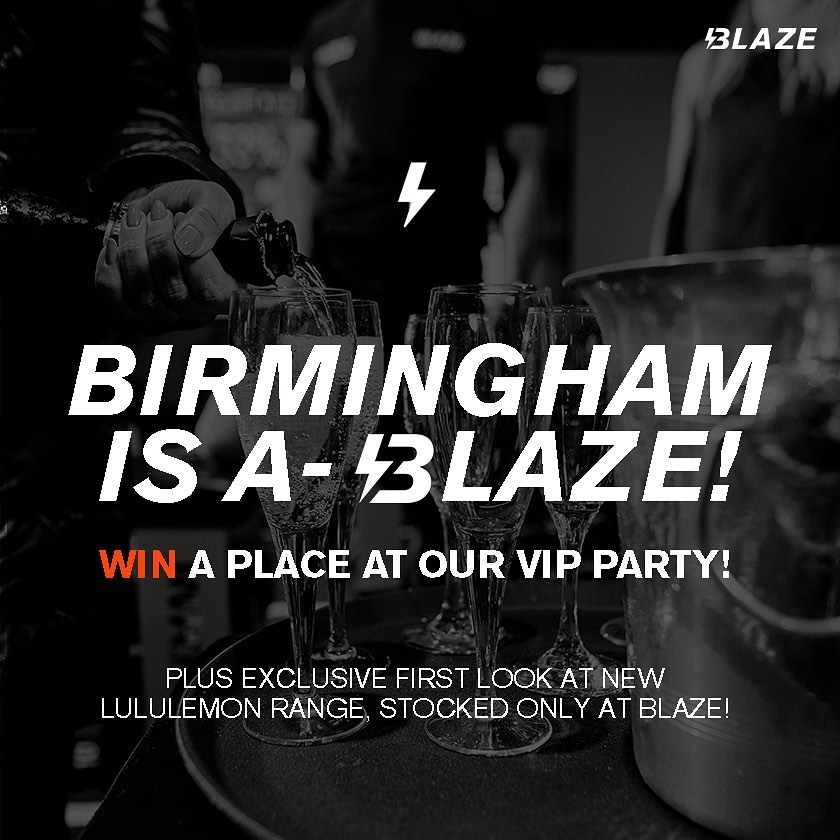

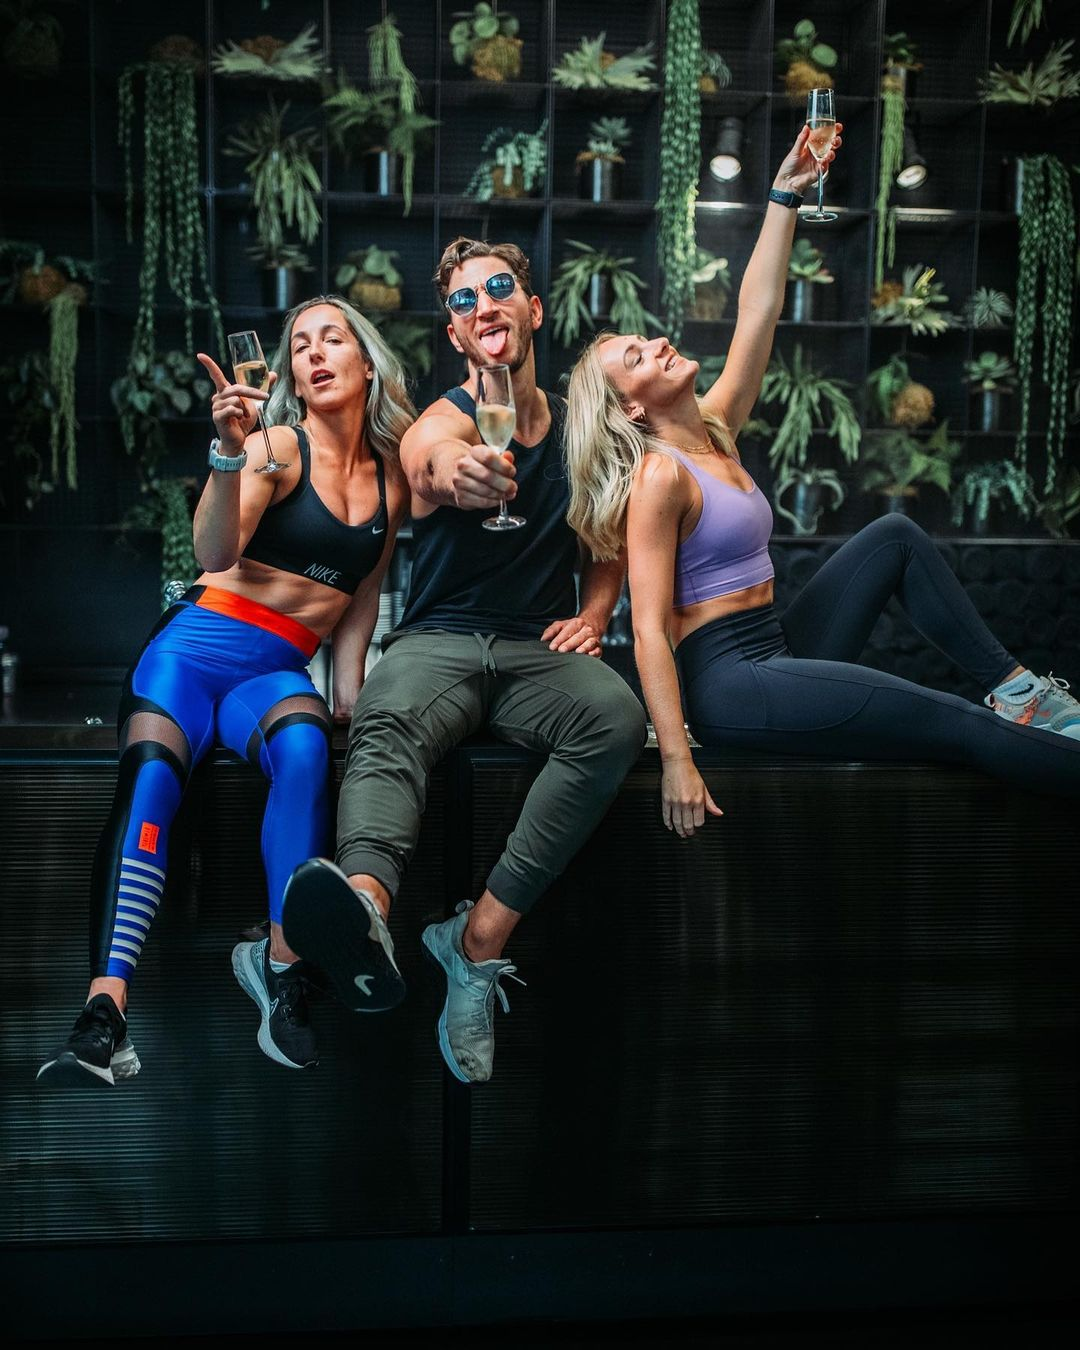

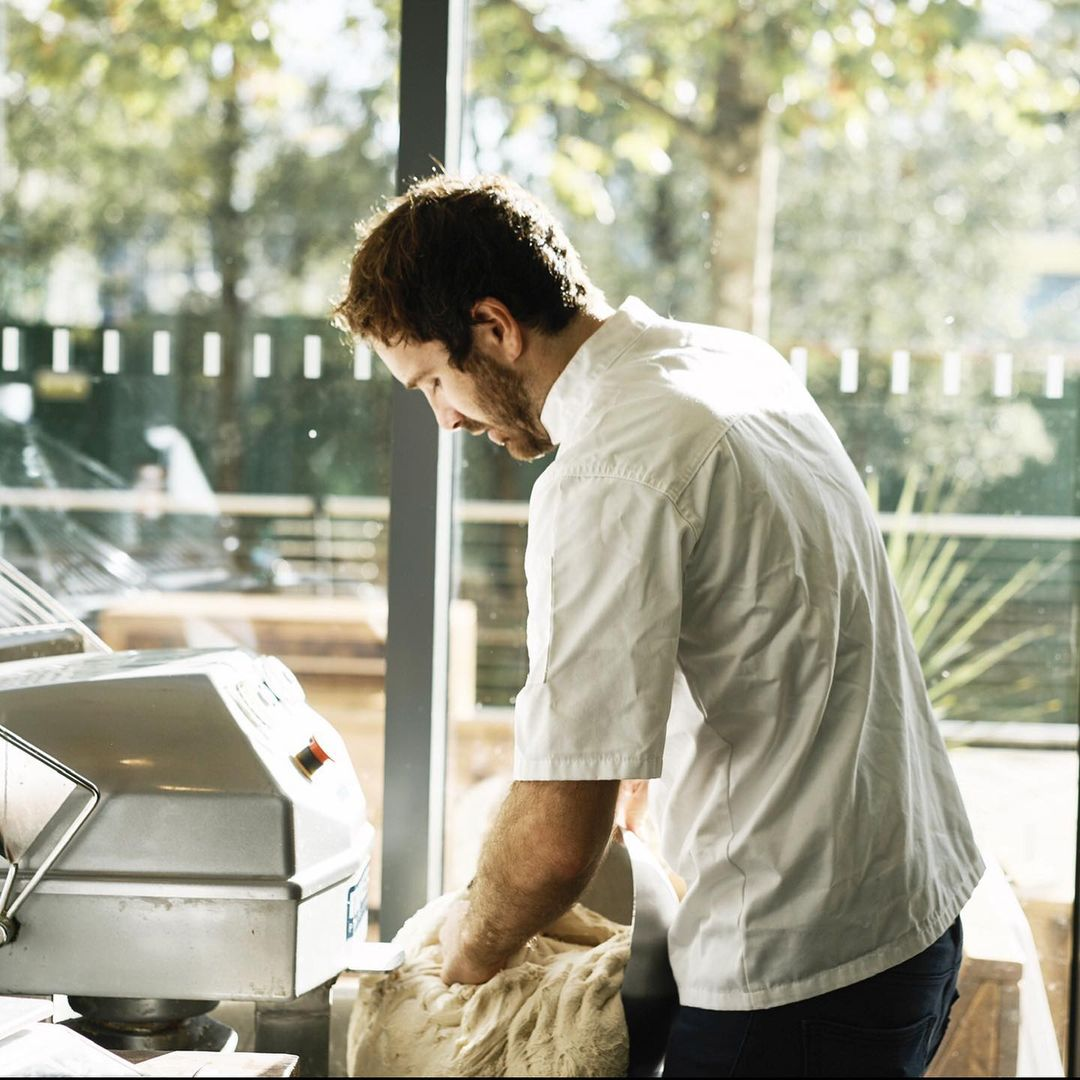

In [28]:
from IPython.display import Image
for i in images_rndm:
    display(Image(filename='C:/Users/sande/Documents/GitHub/Instagram-Engangment-Prediction-NLP-Categorisation/test_img'+i))


Creating the sas for the blobs

In [14]:
def get_blob_sas(account_name,account_key, container_name, blob_name):
    sas_blob = generate_blob_sas(account_name=account_name, 
                                container_name=container_name,
                                blob_name=blob_name,
                                account_key=account_key,
                                permission=BlobSasPermissions(read=True),
                                expiry=datetime.utcnow() + timedelta(hours=24))
    return sas_blob

Function to get the blobs & computer vision features:

In [23]:
'''
Returns the following characterstics of the image. 
'image_url','tags', 'confidence_score', 'accent_color','is_bw', 'dominant_colors', 'bg_color', 'fore_color'
'''
def get_cv_prop(names_blobContent, account_name, account_key, container_name):
    final_tag = []
    cv = CvApiConnector()
    for blob_name in tqdm(names_blobContent):
        if '.jpg' in blob_name:
            blob_sas = get_blob_sas(account_name,account_key, container_name, blob_name)
            url_sas = 'https://'+account_name+'.blob.core.windows.net/'+container_name+'/'+blob_name+'?'+blob_sas
            tags_result_remote = cv.tag(url_sas)
            x ,y = [], []  #collects the tags and conf score respectively
            if (len(tags_result_remote.tags) == 0):
                print("No tags detected.")
            else:
                for tag in tags_result_remote.tags:
                    # print(tag.name, tag.confidence)
                    x.append(tag.name)
                    y.append(tag.confidence)

            #dealing with colors involved in the images
            dom_colors = []
            cv_result_remote = cv.color(url_sas)
            is_bw = int(cv_result_remote.color.is_bw_img)
            hexa = colors.to_rgb('#'+cv_result_remote.color.accent_color)
            
            for i in (cv_result_remote.color.dominant_colors): dom_colors.append(colors.to_rgb(i))
            dom_back = colors.to_rgb(cv_result_remote.color.dominant_color_background)
            dom_fore = colors.to_rgb(cv_result_remote.color.dominant_color_foreground)

            final_tag.append([blob_name, 
            x, y, 
            hexa,
            is_bw,
            dom_colors,
            dom_back,
            dom_fore
            ])
    return final_tag
        

In [16]:
def divide_list(lis, sec):
    resultant_list = []
    for i in range(int(len(lis)/sec)):
            resultant_list.append(lis[i*sec: (i+1)*sec])

    if len(lis)%sec != 0:
        resultant_list.append(lis[(i+1)*sec:])
    return resultant_list



 

In [17]:
#dividing the whole list of the csv images into files containing 8000 text values, to reduce the workload per loop and error handling 
divided_images_df = divide_list(df_imgLink, 3600)
type(divided_images_df[0])

list

In [24]:
len(divided_images_df)

25

In [25]:
for i in divided_images_df[:1]:
    print(len(i))

3600


In [116]:
# 2142
temp_df = pd.read_csv('df_0.csv')

In [27]:

# images_rndm = divide_list(df_imgLink, 10)
j = 1
for i in divided_images_df[1:]:
    rndm = get_cv_prop(i, account_name, account_key, container_name)
    dfRaw_cv = pd.DataFrame(rndm, columns = ['image_url','tags', 'confidence_score', 'accent_color','is_bw', 'dominant_colors', 'bg_color', 'fore_color'])
    dfRaw_cv.to_csv('C:\\Users\\sande\\Documents\\GitHub\\Instagram-Engangment-Prediction-NLP-Categorisation\\df_'+str(j)+'.csv')
    j+=1


 60%|█████▉    | 2142/3600 [21:37<14:29,  1.68it/s] 

No tags detected.


 66%|██████▋   | 2389/3600 [24:10<11:10,  1.80it/s]

No tags detected.


 11%|█         | 380/3600 [03:54<29:15,  1.83it/s]  

No tags detected.


 37%|███▋      | 1347/3600 [13:26<22:57,  1.64it/s]

No tags detected.


 42%|████▏     | 1523/3600 [15:09<19:58,  1.73it/s]

No tags detected.


 45%|████▍     | 1618/3600 [16:06<17:25,  1.90it/s]

No tags detected.


 57%|█████▋    | 2051/3600 [20:37<18:32,  1.39it/s]

No tags detected.


 57%|█████▋    | 2052/3600 [20:37<17:42,  1.46it/s]

No tags detected.


 18%|█▊        | 639/3600 [06:43<26:49,  1.84it/s]

No tags detected.


 18%|█▊        | 645/3600 [06:46<25:21,  1.94it/s]

No tags detected.


 18%|█▊        | 646/3600 [06:47<26:09,  1.88it/s]

No tags detected.


 23%|██▎       | 814/3600 [08:28<31:53,  1.46it/s]

No tags detected.


 65%|██████▌   | 2345/3600 [24:25<12:43,  1.64it/s]  

No tags detected.


 95%|█████████▌| 3422/3600 [35:25<01:33,  1.90it/s]

No tags detected.


 35%|███▌      | 1262/3600 [14:29<23:49,  1.64it/s]  

No tags detected.


 86%|████████▌ | 3078/3600 [32:46<04:49,  1.80it/s]

No tags detected.


 76%|███████▌  | 2728/3600 [30:46<10:52,  1.34it/s]   

No tags detected.


 15%|█▌        | 540/3600 [05:43<27:58,  1.82it/s]

No tags detected.


 63%|██████▎   | 2270/3600 [31:00<13:15,  1.67it/s]   

No tags detected.


 70%|██████▉   | 2505/3600 [33:28<12:12,  1.49it/s]

No tags detected.


 37%|███▋      | 1334/3600 [13:18<22:30,  1.68it/s] 

No tags detected.


 90%|█████████ | 3258/3600 [32:20<03:16,  1.74it/s]

No tags detected.


  7%|▋         | 238/3600 [02:25<36:44,  1.53it/s]

No tags detected.


 41%|████      | 1476/3600 [14:51<20:27,  1.73it/s] 

No tags detected.


 43%|████▎     | 1545/3600 [15:33<20:48,  1.65it/s]

No tags detected.


 95%|█████████▌| 3426/3600 [34:20<01:41,  1.72it/s]

No tags detected.


 55%|█████▌    | 1984/3600 [23:55<14:48,  1.82it/s]  

No tags detected.


 55%|█████▌    | 1986/3600 [23:56<14:55,  1.80it/s]

No tags detected.


 61%|██████    | 2197/3600 [26:00<13:35,  1.72it/s]

No tags detected.


  6%|▋         | 226/3600 [02:20<33:42,  1.67it/s]

No tags detected.


  6%|▋         | 231/3600 [02:23<38:46,  1.45it/s]

No tags detected.


  8%|▊         | 270/3600 [02:46<34:11,  1.62it/s]

No tags detected.


 46%|████▌     | 1661/3600 [16:26<18:30,  1.75it/s]

No tags detected.


 23%|██▎       | 822/3600 [08:14<29:58,  1.54it/s]  

No tags detected.


 55%|█████▌    | 1984/3600 [19:41<16:19,  1.65it/s]

No tags detected.


 11%|█▏        | 411/3600 [05:50<35:51,  1.48it/s]   

No tags detected.


 62%|██████▏   | 2217/3600 [27:46<13:10,  1.75it/s]   

No tags detected.


 82%|████████▏ | 2939/3600 [29:19<06:11,  1.78it/s] 

No tags detected.


 82%|████████▏ | 2952/3600 [29:27<06:42,  1.61it/s]

No tags detected.


  1%|▏         | 48/3600 [00:30<36:17,  1.63it/s]

No tags detected.


 87%|████████▋ | 3131/3600 [31:33<04:26,  1.76it/s]  

No tags detected.


 98%|█████████▊| 3541/3600 [35:44<00:32,  1.80it/s]

No tags detected.


 44%|████▍     | 1591/3600 [16:13<17:55,  1.87it/s]

No tags detected.


 92%|█████████▏| 3308/3600 [33:22<03:04,  1.59it/s]

No tags detected.


 30%|██▉       | 1065/3600 [10:31<29:33,  1.43it/s]

No tags detected.


 44%|████▍     | 1584/3600 [15:37<19:58,  1.68it/s]

No tags detected.


 68%|██████▊   | 2443/3600 [24:04<12:30,  1.54it/s]

No tags detected.


  4%|▍         | 136/3600 [01:22<33:40,  1.71it/s]

No tags detected.


 41%|████▏     | 1488/3600 [14:52<20:42,  1.70it/s]

No tags detected.


 27%|██▋       | 968/3600 [09:40<25:59,  1.69it/s]  

No tags detected.


 40%|███▉      | 1437/3600 [14:20<21:13,  1.70it/s]

No tags detected.


 67%|██████▋   | 2410/3600 [23:53<14:23,  1.38it/s]

No tags detected.


 83%|████████▎ | 2981/3600 [29:31<05:42,  1.81it/s]

No tags detected.


 13%|█▎        | 481/3600 [04:34<28:48,  1.80it/s]

No tags detected.


 59%|█████▉    | 2115/3600 [20:10<15:36,  1.59it/s]

No tags detected.


 11%|█         | 399/3600 [03:45<29:17,  1.82it/s]

No tags detected.


 83%|████████▎ | 3002/3600 [28:15<05:05,  1.95it/s]

No tags detected.


 26%|██▌       | 936/3600 [08:57<24:33,  1.81it/s]

No tags detected.


 98%|█████████▊| 3518/3600 [33:19<00:45,  1.81it/s]

No tags detected.


 15%|█▍        | 526/3600 [04:55<26:03,  1.97it/s]

No tags detected.


 15%|█▍        | 531/3600 [04:58<28:25,  1.80it/s]

No tags detected.


 25%|██▌       | 915/3600 [08:32<22:30,  1.99it/s]  

No tags detected.


 34%|███▍      | 1239/3600 [11:40<21:16,  1.85it/s]

No tags detected.


 48%|████▊     | 1742/3600 [16:28<19:03,  1.63it/s]

No tags detected.


 49%|████▉     | 1756/3600 [16:35<14:58,  2.05it/s]

No tags detected.


100%|██████████| 2116/2116 [20:06<00:00,  1.75it/s]


#### Testing one of the sample df containing CV features

In [90]:
df_temp = pd.read_csv('C:\\Users\\sande\\Documents\\GitHub\\Instagram-Engangment-Prediction-NLP-Categorisation\\df_'+ str(i)+'.csv', index_col= [1])
df_temp.drop('Unnamed: 0', axis= 1, inplace= True)
df_temp.head()

,tags,confidence_score,accent_color,is_bw,dominant_colors,bg_color,fore_color
image_url,,,,,,,
j_l0o35trt2i5q23iymp.718da3272b070aa55e0885902c10ea45eebbeea1.file_l0o39fbc2e8ab231a2.image_url.jpg,"['text', 'font', 'graphics', 'screenshot', 'gr...","[0.9980798959732056, 0.9481294751167297, 0.881...","(0.788235294117647, 0.00784313725490196, 0.007...",0,"[(1.0, 0.7529411764705882, 0.796078431372549)]","(1.0, 0.7529411764705882, 0.796078431372549)","(1.0, 0.7529411764705882, 0.796078431372549)"
j_l0o35trt2i5q23iymp.718da3272b070aa55e0885902c10ea45eebbeea1.file_l0o39f7o4hxyfirew.image_url.jpg,"['dessert', 'baked goods', 'baking', 'snack', ...","[0.9897554516792297, 0.987897515296936, 0.9828...","(0.6901960784313725, 0.14901960784313725, 0.10...",0,"[(0.6470588235294118, 0.16470588235294117, 0.1...","(0.6470588235294118, 0.16470588235294117, 0.16...","(0.0, 0.0, 0.0)"
j_l0o35trt2i5q23iymp.718da3272b070aa55e0885902c10ea45eebbeea1.file_l0o39f9q1xr7g43sbf.image_url.jpg,"['food', 'fruit', 'baked goods', 'breakfast', ...","[0.9808361530303955, 0.9546540379524231, 0.947...","(0.6588235294117647, 0.4392156862745098, 0.141...",0,"[(0.6470588235294118, 0.16470588235294117, 0.1...","(0.6470588235294118, 0.16470588235294117, 0.16...","(0.6470588235294118, 0.16470588235294117, 0.16..."
j_l0o35trt2i5q23iymp.718da3272b070aa55e0885902c10ea45eebbeea1.file_l0o39f9u2iqs0h6tj2.image_url.jpg,"['food', 'bread', 'fast food', 'bun', 'america...","[0.9958561658859253, 0.981575608253479, 0.9799...","(0.24313725490196078, 0.12549019607843137, 0.0...",0,"[(0.6470588235294118, 0.16470588235294117, 0.1...","(0.6470588235294118, 0.16470588235294117, 0.16...","(0.6470588235294118, 0.16470588235294117, 0.16..."
j_l0o35trt2i5q23iymp.718da3272b070aa55e0885902c10ea45eebbeea1.file_l0o39fb81uwxx3cwop.image_url.jpg,"['text', 'font', 'design', 'yellow', 'graphics...","[0.9993002414703369, 0.9640201926231384, 0.951...","(0.792156862745098, 0.7372549019607844, 0.0039...",0,"[(1.0, 1.0, 0.0)]","(1.0, 1.0, 0.0)","(1.0, 1.0, 0.0)"


In [101]:
list_cvDF = []
for i in tqdm(range(len(divided_images_df))):
    df_temp = pd.read_csv('C:\\Users\\sande\\Documents\\GitHub\\Instagram-Engangment-Prediction-NLP-Categorisation\\df_'+ str(i)+'.csv')
    df_temp.drop('Unnamed: 0', axis= 1, inplace= True)
    list_cvDF.append(df_temp)


100%|██████████| 25/25 [00:01<00:00, 23.40it/s]


In [102]:
dfComplete_cv = pd.concat(list_cvDF, axis = 0, ignore_index= False)
dfComplete_cv.head()

,image_url,tags,confidence_score,accent_color,is_bw,dominant_colors,bg_color,fore_color
0,j_l0o35trt2i5q23iymp.718da3272b070aa55e0885902...,"['text', 'font', 'graphics', 'screenshot', 'gr...","[0.9980798959732056, 0.9481294751167297, 0.881...","(0.788235294117647, 0.00784313725490196, 0.007...",0,"[(1.0, 0.7529411764705882, 0.796078431372549)]","(1.0, 0.7529411764705882, 0.796078431372549)","(1.0, 0.7529411764705882, 0.796078431372549)"
1,j_l0o35trt2i5q23iymp.718da3272b070aa55e0885902...,"['dessert', 'baked goods', 'baking', 'snack', ...","[0.9897554516792297, 0.987897515296936, 0.9828...","(0.6901960784313725, 0.14901960784313725, 0.10...",0,"[(0.6470588235294118, 0.16470588235294117, 0.1...","(0.6470588235294118, 0.16470588235294117, 0.16...","(0.0, 0.0, 0.0)"
2,j_l0o35trt2i5q23iymp.718da3272b070aa55e0885902...,"['food', 'fruit', 'baked goods', 'breakfast', ...","[0.9808361530303955, 0.9546540379524231, 0.947...","(0.6588235294117647, 0.4392156862745098, 0.141...",0,"[(0.6470588235294118, 0.16470588235294117, 0.1...","(0.6470588235294118, 0.16470588235294117, 0.16...","(0.6470588235294118, 0.16470588235294117, 0.16..."
3,j_l0o35trt2i5q23iymp.718da3272b070aa55e0885902...,"['food', 'bread', 'fast food', 'bun', 'america...","[0.9958561658859253, 0.981575608253479, 0.9799...","(0.24313725490196078, 0.12549019607843137, 0.0...",0,"[(0.6470588235294118, 0.16470588235294117, 0.1...","(0.6470588235294118, 0.16470588235294117, 0.16...","(0.6470588235294118, 0.16470588235294117, 0.16..."
4,j_l0o35trt2i5q23iymp.718da3272b070aa55e0885902...,"['text', 'font', 'design', 'yellow', 'graphics...","[0.9993002414703369, 0.9640201926231384, 0.951...","(0.792156862745098, 0.7372549019607844, 0.0039...",0,"[(1.0, 1.0, 0.0)]","(1.0, 1.0, 0.0)","(1.0, 1.0, 0.0)"


In [103]:
print(dfRaw.columns)
dfRaw.head()

Index(['status', 'description', 'username', 'fbid', 'connected_fb_page',
       'profile_pic_url', 'full_name', 'is_private', 'category_name',
       'category_enum', 'is_joined_recently', 'highlight_reel_count',
       'has_ar_effects', 'has_clips', 'has_guides', 'has_channel',
       'is_business_account', 'business_address_json',
       'business_contact_method', 'business_phone_number', 'account',
       'caption', 'profile_name', 'profile_image_link', 'biography', 'id',
       'business_email', 'external_url', 'following', 'likes', 'media_type',
       'posts_count', 'followers', 'is_verified', 'datetime', 'image_url',
       'url', 'comments', 'video_view_count', 'video_url', 'location', 'input',
       'input_account', 'input_posts_number', 'input_date_of_post',
       'input_post_type', 'input_stop_id', 'warning', 'error'],
      dtype='object')


,status,description,username,fbid,connected_fb_page,profile_pic_url,full_name,is_private,category_name,category_enum,...,video_url,location,input,input_account,input_posts_number,input_date_of_post,input_post_type,input_stop_id,warning,error
0,age_gated_account,Restricted profile | You must be 16 years old ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,mcdonaldsuk,200.0,01/01/2021,NormalPosts,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,yeastbakery,200.0,01/01/2021,NormalPosts,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,yeastbakery,200.0,01/01/2021,NormalPosts,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,yeastbakery,200.0,01/01/2021,NormalPosts,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,yeastbakery,200.0,01/01/2021,NormalPosts,NaN,NaN,NaN


In [105]:
dfComplete_cv.to_csv('C:\\Users\\sande\\Documents\\GitHub\\Instagram-Engangment-Prediction-NLP-Categorisation\\df_complete_cvFeatures.csv', encoding = 'utf-8')

We see that 'image_url' column in the dfRaw contains the links of images. 
Also, dfComplete_cv contains 'image_url' column, that contains the links for the images.
So, we use inner join on these two df using the common column as key. 

In [107]:
merged_df = dfRaw.merge(dfComplete_cv, on = 'image_url')

In [115]:
merged_df.to_csv('C:\\Users\\sande\\Documents\\GitHub\\Instagram-Engangment-Prediction-NLP-Categorisation\\RAW_FINAL_DATAFRAME_88k_29042022.csv', encoding = 'utf-8')